   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 21.7 MB/s eta 0:00:00
Mounted at /content/drive


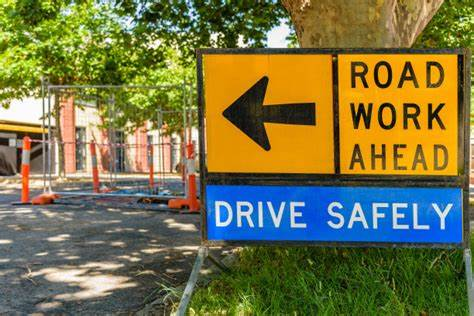

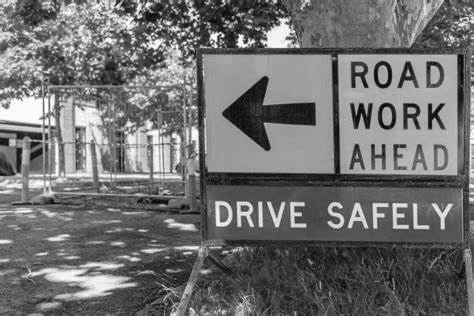

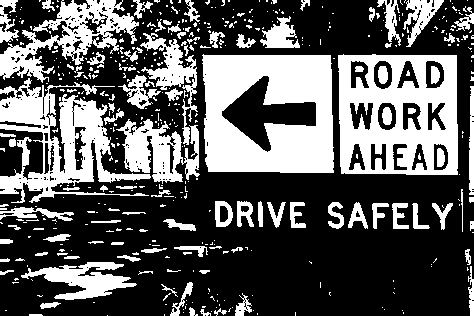

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteText: ROAD
Confidence: 0.9992863535881042
Bounding box: [[347, 57], [451, 57], [451, 95], [347, 95]]

Text: WORK
Confidence: 0.8430901765823364
Bounding box: [[345, 95], [451, 95], [451, 135], [345, 135]]

Text: AHEAD
Confidence: 0.9990235341573177
Bounding box: [[346, 138], [454, 138], [454, 174], [346, 174]]

Text: DRIVE SAFELY
Confidence: 0.9823335897729988
Bounding box: [[207, 191], [458, 191], [458, 236], [207, 236]]



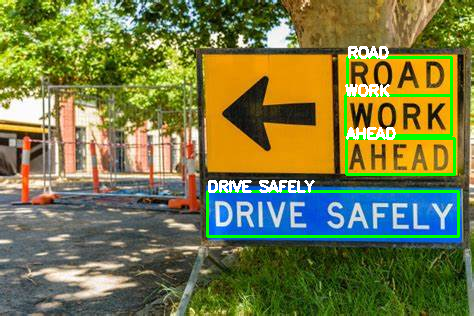

In [4]:
!pip install easyocr
import cv2
import numpy as np
from google.colab import drive
from google.colab.patches import cv2_imshow
import easyocr
#import the necessary lib

drive.mount('/content/drive')
img = cv2.imread('/content/drive/MyDrive/images/lp.jpg')
cv2_imshow(img)
#load and show the image frome MyDrive

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
car_blur = cv2.GaussianBlur(gray,(1,1),0)
cv2_imshow(car_blur)
#pre-process the image with GaussianBlur, and show the result

t,dst = cv2.threshold(car_blur, 130, 255, cv2.THRESH_BINARY )
cv2_imshow(dst)
#pre-process the image by threshold method, and show the result

ocr = easyocr.Reader(['en'])
results = ocr.readtext(dst)
#call the ocr lib to detect the text on the picture,
# output the bounding box, text detected and confident level

for (bbox, text, confidence) in results:
    print(f"Text: {text}\nConfidence: {confidence}\nBounding box: {bbox}\n")
    top_left = tuple(bbox[0])
    top_right = tuple(bbox[1])
    bottom_right = tuple(bbox[2])
    bottom_left = tuple(bbox[3])
    cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)
    cv2.putText(img, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
#Iterate through the recognition results and print the bounding box of each text in green，
# and display the detected text next to the text box

cv2_imshow(img)










